# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# creating the list of the sales
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# Finding the mean
theMean = sum(sales)/len(sales)
print(theMean)

3052.714285714286


In [0]:
# Finding the variance of the sales list
# Will write a function that will find the difference of a point from the mean
def findDiff(aPoint):
  return aPoint - theMean



In [11]:
# Will use the map function to try to apply this to all the points
differences = list(map(findDiff, sales))
print(differences)

[452.2857142857142, -652.7142857142858, -25.71428571428578, -254.71428571428578, 647.2857142857142, 197.28571428571422, -363.7142857142858]


In [13]:
# Squaring the differences
diffSquared = list(map(lambda x: x**2, differences))
diffSquared

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [15]:
# Will sum the squared differences and then divide by the number of observations
sumVal = sum(diffSquared)
theVar = sumVal/len(sales)
print(theVar)
# Checking to see if I got the same as the numpy version
np.var(sales)

183761.06122448976


183761.06122448976

In [17]:
# Creating a function that will do the whole thing and then return the variance
# and the mean.  THIS IS FOR A POPULATION AND NOT A SAMPLE
def findMeanandVar(aList):
  theMean = sum(aList)/len(aList)
# Finding the differences
  diff = list(map(lambda x: x- theMean, aList))
# Getting the squares of the differences
  diffSquared = list(map(lambda x: x**2, diff ))
# Finding the (sum of the squared) / population length or sample length - 1
# I will be using the population lenght
  theVar  = sum(diffSquared)/len(aList)
  return (theMean, theVar)


findMeanandVar(sales)

(3052.714285714286, 183761.06122448976)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [24]:
# Making a list for the number of customers into the store
cust = [127, 80, 105, 92, 120, 115, 93]

#Finding the covariance using numpy
theCov = np.cov(sales, cust)
print(theCov)

# Will also try using a pandas way

# Creating a dataframe
df = pd.DataFrame({"sales": sales, "customers": cust})
print("\n\n")
df.cov()

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]





,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [27]:
# Finding the variance of the sales and customers
# (Wiil use the formula made previously)
salesMean , salesVar = findMeanandVar(sales) 
custMean,  custVar = findMeanandVar(cust)
# Squaring the variances to get the standard deviation
salesStd = math.sqrt(salesVar)
custStd = math.sqrt(custVar)
print("The sales standard deviation  ", salesStd)
print("The customer standard deviation  ", custStd)
# Checking with the numpy standard deviation method
print("The sales standard deviation using numpy ", np.std(sales))
print("The customer standard deviation using numpy ", np.std(cust))

The sales standard deviation   428.67360686714756
The customer standard deviation   15.792015549069118
The sales standard deviation using numpy  428.67360686714756
The customer standard deviation using numpy  15.792015549069118


In [37]:
# Finding the correlation coefficient

# Getting again the covarirance of both sales and customers
theCov = df['customers'].cov(df['sales'])
print("This is the covariance of customers and sales: ",theCov)

# Getting the standard deviation for two 
custStd = df['customers'].std(ddof=1)
salesStd = df['sales'].std(ddof=1)
# Getting the correlation coefficient
corrCoef = theCov/(salesStd * custStd)
print("This is the correlation coefficient: ", corrCoef)
# Checking the work with numpy
print(np.corrcoef(sales, cust))
# Checking the work with pandaas
df.corr()



This is the covariance of customers and sales:  7604.357142857142
This is the correlation coefficient:  0.9628339778148909
[[1.         0.96283398]
 [0.96283398 1.        ]]


,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")


In [39]:
# Calculating the covariance matrix
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [41]:
# Calculating the correlation matrix
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [42]:
titanic.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'has_cabin_number'],
      dtype='object')

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

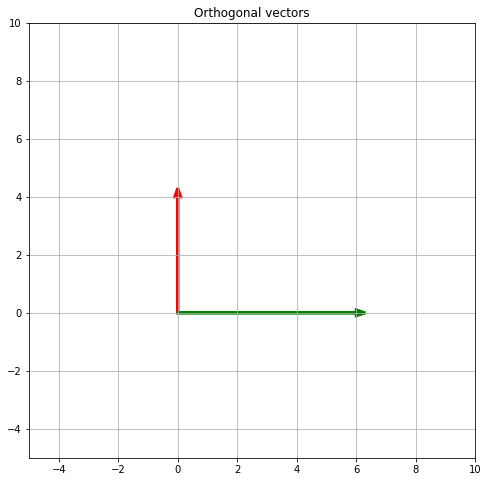

In [52]:
# Plotting two vectors that are orthogonal to each other
# A synonym for orthongonal is perpendicular

# Creating the two vectors
vect1 = np.array([0, 4])
vect2 = np.array([6, 0])

fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
ax.set_xlim(-5,10)
ax.set_ylim(-5,10)
ax.set_title("Orthogonal vectors")

plt.arrow(0,0, vect1[0], vect1[1], linewidth=3, 
          head_width=.2, head_length=.3, color="red")

plt.arrow(0,0, vect2[0], vect2[1], linewidth=3, 
          head_width=.2, head_length=.3, color="green");

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [56]:
# Checking if the following vectors are orthongonal by using the dot
# product
a = np.array([-5 , 3 ,7])
b = np.array([6,-8,2 ])
theDot = np.dot(a, b)
print("The dot product is: ", theDot)
print("They are not orthogonal becuase the dot product does not equal zero")

The dot product is:  -40
They are not orthogonal becuase the dot product does not equal zero


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [66]:
# Creating the list
c = np.array([2, -15, 6, 20])

# Calculating the norm of the vector
c_norm = np.linalg.norm(c)
print("The norm is :",c_norm)

# Finding the dot product of c
c_dot = np.dot(c, c)
print("The dot is: ", c_dot)

# Finding the C transpose times c
print("C(transpose) times c is: ", np.matmul(c.T, c))

# The transposing and then multiplication of c is the same as the dot
# because when transposing a one row matrix it stays the same.
# Matrix multiplication uses the dot product of the row of first matrix
# with the column of the second matrix and so it is the same as finding
# the dot product with two vectors.


The norm is : 25.787593916455254
The dot is:  665
C(transpose) times c is:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} +11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [70]:
f = np.array ([4,  12, 11, 9, 2] )
# Will find the length or the norm of the vector first
norm_f = np.linalg.norm(f)
# Getting the unit vector
f_hat = f/norm_f
print("This is the unit vector of the f vector: ", f_hat)
print("This is the length of the f_hat vector: ", np.linalg.norm(f_hat))

This is the unit vector of the f vector:  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
This is the length of the f_hat vector:  0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

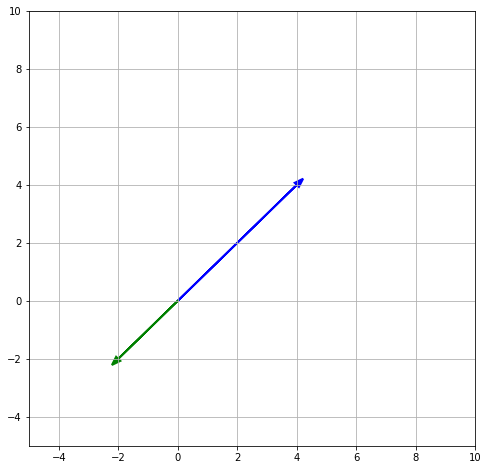

In [72]:
# These two are linearly dependent
# Creating two vectors for the linear dependencies
vect1 = np.array([4,4])
vect2 = np.array([-2,-2])
# Making the graphs
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.arrow(0, 0, vect1[0], vect1[1], linewidth=2, 
          head_width=.2, head_length=.3, color="blue")

plt.arrow(0, 0, vect2[0], vect2[1], linewidth=2, 
          head_width=.2, head_length=.3, color="green")

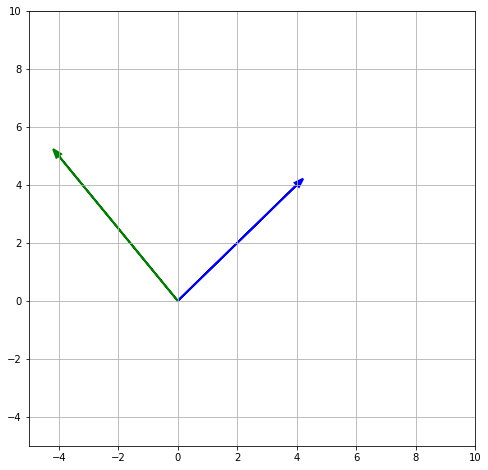

In [73]:
# Doing two vectors that are linearly independent

vect1 = np.array([4,4])
vect2 = np.array([-4,5])
# Making the graphs
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.arrow(0, 0, vect1[0], vect1[1], linewidth=2, 
          head_width=.2, head_length=.3, color="blue")

plt.arrow(0, 0, vect2[0], vect2[1], linewidth=2, 
          head_width=.2, head_length=.3, color="green")

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The span is just on the line


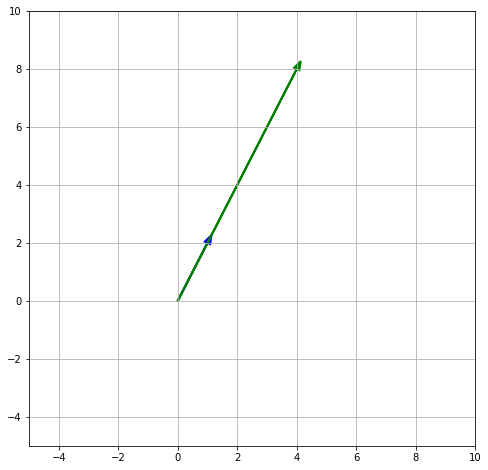

In [77]:
# Checking the span by graphing the vectors
vect1 = g = np.array([1, 2])
vect2 = h = np.array([4, 8])
# Making the graphs
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.arrow(0, 0, vect1[0], vect1[1], linewidth=2, 
          head_width=.2, head_length=.3, color="blue")

plt.arrow(0, 0, vect2[0], vect2[1], linewidth=2, 
          head_width=.2, head_length=.3, color="green")

# The span is just on the line
print("The span is just on the line")

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The span is all of 2 dimensional space and not 3


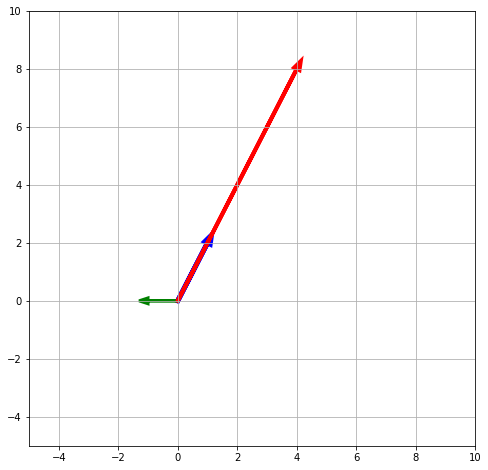

In [78]:
# Graphing to check the span of the vectors
vect1 = np.array([1, 2, 3])
vect2 = np.array([-1, 0, 7])
vect3 = np.array([4, 8, 2])


# Making the graphs
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.arrow(0, 0, vect1[0], vect1[1], linewidth=5, 
          head_width=.2, head_length=.3, color="blue")

plt.arrow(0, 0, vect2[0], vect2[1], linewidth=3, 
          head_width=.2, head_length=.3, color="green")

plt.arrow(0, 0, vect3[0], vect3[1], linewidth=4, 
          head_width=.2, head_length=.3, color="red")

# The span is all of 2 dimensional space not 3
print("The span is all of 2 dimensional space and not 3")

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



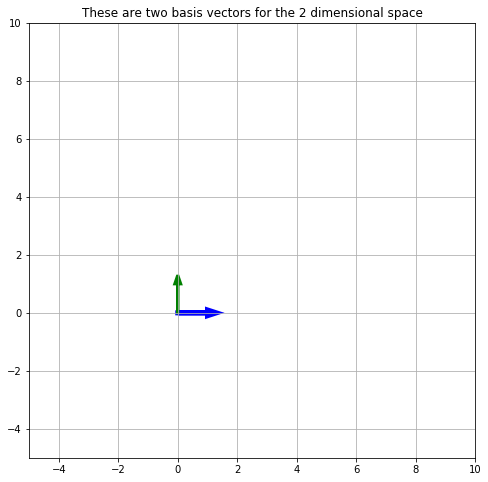

In [82]:


vect1 = np.array([1, 0])
vect2 = np.array([0, 1])



# Making the graphs
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.title("These are two basis vectors for the 2 dimensional space")

plt.arrow(0, 0, vect1[0], vect1[1], linewidth=5, 
          head_width=.2, head_length=.3, color="blue")

plt.arrow(0, 0, vect2[0], vect2[1], linewidth=3, 
          head_width=.2, head_length=.3, color="green");




## 6.2 What does it mean to form a basis?

To form a basis means to have linear independant vectors.  Linear combinations of the two vectors will fill the entire space.  If you want basis of 2d space you need two linear independant vectors 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

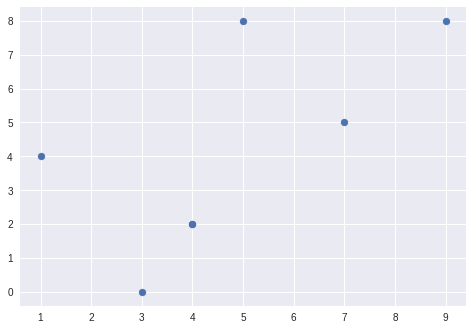

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()